In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_tracks = pd.read_csv('/home/bhavya/data analysis projects/spotify/tracks.csv')
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


# Data Wrangling

In [15]:
#A DataFrame object has two axes: “axis 0” and “axis 1”. “axis 0” represents rows and “axis 1” represents columns

df_tracks["duration"] = df_tracks["duration_ms"].apply(lambda x: round(x/1000))
df_tracks.drop("duration_ms", inplace=True, axis=1)

In [3]:
# changing the index 

df_tracks.set_index('release_date', inplace=True)
df_tracks.index = pd.to_datetime(df_tracks.index)
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
release_date,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


# Now, Cleaning the Data:

In [4]:
#null values
pd.isnull(df_tracks).sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [10]:
df_tracks.dropna(inplace=True)
df_tracks.drop_duplicates(inplace=True)

# Analysis

In [11]:
# which artist has most no of followers on spotify?
popart = df_tracks[['artists','popularity']].sort_values(by=['popularity'],ascending=False).head()
print(popart)

                                                   artists  popularity
release_date                                                          
2021-03-19    ['Justin Bieber', 'Daniel Caesar', 'Giveon']         100
2021-01-08                              ['Olivia Rodrigo']          99
2021-01-06                                 ['Masked Wolf']          98
2020-12-04                                  ['Kali Uchis']          97
2020-03-20                                  ['The Weeknd']          97


Now we list the artists of popular songs with their durations in milliseconds.

In [12]:
songth = df_tracks[['name','popularity','duration_ms']].sort_values(by=['popularity','duration_ms'],ascending=False).head()
print(songth)

                                                name  popularity  duration_ms
release_date                                                                 
2021-03-19    Peaches (feat. Daniel Caesar & Giveon)         100       198082
2021-01-08                           drivers license          99       242014
2021-01-06                    Astronaut In The Ocean          98       132780
2020-03-20                           Save Your Tears          97       215627
2020-12-04                                 telepatía          97       160191


In [13]:
#to find least popular tracks

sorted_df = df_tracks.sort_values('popularity', ascending=True).head()
sorted_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
release_date,,,,,,,,,,,,,,,,,,,
1934-01-01,2hV7SShXsBeomXtpd53QNh,You and the night and the music,0,168098,0,"['Libby Holman & Her Orchestra', 'Libby Holman']","['1BJcpnHvZBZSgUBEch0utn', '08czVWdmLSEES9nLc4...",0.306,0.171,4,-16.752,0,0.0374,0.981,0.000002,0.3720,0.352,127.261,5
1923-01-01,2heB3jEdRgx83180axN3cd,Roses of Picardy,0,162843,0,['Paul Specht'],['1tCrPspkGQyLDhWFmTZanI'],0.324,0.495,5,-14.571,1,0.0336,0.978,0.760000,0.4060,0.702,207.380,4
1923-01-01,2ew5dyayICmi1B9DHhQhEh,I'm the last of the red hot mamas,0,118465,0,['Sophie Tucker'],['58nEgrqod6YO5ZATASjIQ8'],0.607,0.319,0,-15.191,1,0.3580,0.996,0.577000,0.6640,0.795,84.080,4
1923-01-01,2baUvPSWFyxIkSUECmghxC,Snakes hips,0,190063,0,['The Georgians'],['58LQXzq5kNsvPQdviB4ZyL'],0.640,0.541,3,-7.905,1,0.0384,0.996,0.879000,0.0853,0.844,98.589,4
1923-01-01,2ZTaPJ3LuOz4DC6nnoeTEv,The man I love,0,172905,0,"['Sophie Tucker', 'Miff Mole']","['58nEgrqod6YO5ZATASjIQ8', '1WZqArTg7JOsXScvGF...",0.487,0.163,8,-15.863,1,0.0449,0.992,0.000041,0.0702,0.502,109.412,5


We can see that 'Newspaper Reports On Abner' is the least popular song here.

In [14]:
# top songs with popularity > 90
most_popular = df_tracks.query('popularity>90', inplace=False).sort_values('popularity', ascending=False)
most_popular[:10]

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
release_date,,,,,,,,,,,,,,,,,,,
2021-03-19,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
2021-01-08,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
2021-01-06,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
2020-03-20,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
2020-12-04,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
2020-03-20,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
2021-03-05,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
2020-09-16,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
2019-11-07,60ynsPSSKe6O3sfwRnIBRf,Streets,94,226987,1,['Doja Cat'],['5cj0lLjcoR7YOSnhnX0Po5'],0.749,0.463,11,-8.433,1,0.0828,0.20800,0.037100,0.3370,0.190,90.028,4


These are the top 10 most popular songs on spotify with a popularity score of over 90 with 'Peaches' being the most popular song.

In [9]:
#to check artist at 18th row of dataset:
df_tracks[['artists']].iloc[18]

artists    ['Victor Boucher']
Name: 1922-01-01 00:00:00, dtype: object

In [16]:
df_tracks.duration.head()

release_date
1922-02-22    127
1922-06-01     98
1922-03-21    182
1922-03-21    177
1922-01-01    163
Name: duration, dtype: int64

Now we will plot a correlation graph between all the variables in the dataset.

[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'danceability'),
 Text(2.5, 0, 'energy'),
 Text(3.5, 0, 'loudness'),
 Text(4.5, 0, 'speechiness'),
 Text(5.5, 0, 'acousticness'),
 Text(6.5, 0, 'instrumentalness'),
 Text(7.5, 0, 'liveness'),
 Text(8.5, 0, 'valence'),
 Text(9.5, 0, 'tempo'),
 Text(10.5, 0, 'time_signature'),
 Text(11.5, 0, 'duration')]

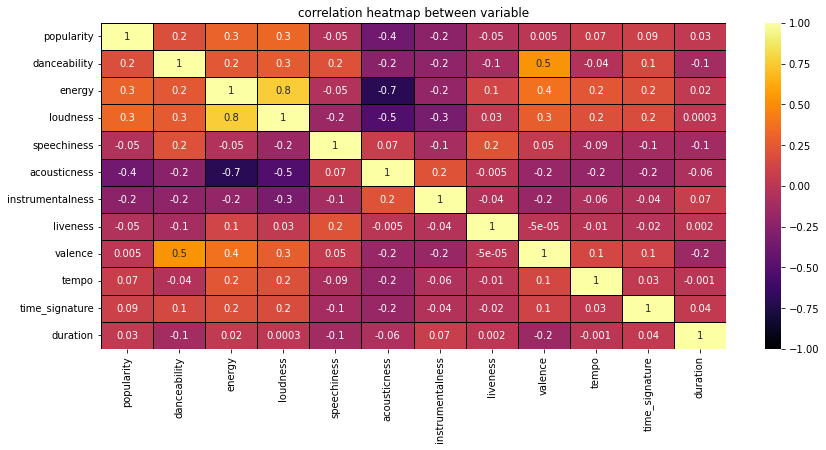

In [17]:
corr_df =  df_tracks.drop(["key","mode","explicit"], axis=1).corr(method="pearson")
plt.figure(figsize=(14,6))
#fmt is string formatting code for writing annotations
#vmin vmin are to anchor the color map
#cmap is color map, google search sns cmap

heatmap = sns.heatmap(corr_df,annot=True,fmt=".1g",vmin=-1,vmax=1, center=0, cmap="inferno",linewidth=1, linecolor="Black")
heatmap.set_title("correlation heatmap between variable")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

#in heatmap, values that have less than 0 correlation have -ve corr, and above 0 have +ve corr

We now take 0.4% of the data and create a regression plot from it.
So we sample the data now:

In [18]:
sample_df = df_tracks.sample((int(0.004*len(df_tracks))))

In [19]:
print(len(sample_df))
#to print 0.4% of total dataset, which is 2346

2346


Plotting a correlation map between loudness and energy.

Text(0.5, 1.0, 'loudness vs energy correlation')

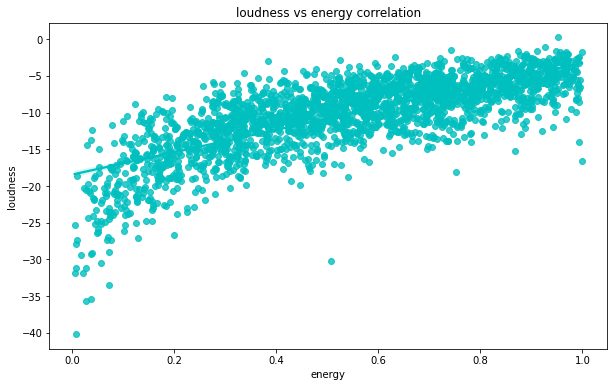

In [20]:
plt.figure(figsize=(10,6))
#regplot = regression plot
sns.regplot(data= sample_df, y="loudness", x="energy", color="c").set_title("loudness vs energy correlation")

Plotting a correlation map bw popularity and acousticness.

Text(0.5, 1.0, 'popularity vs acousticness correlation')

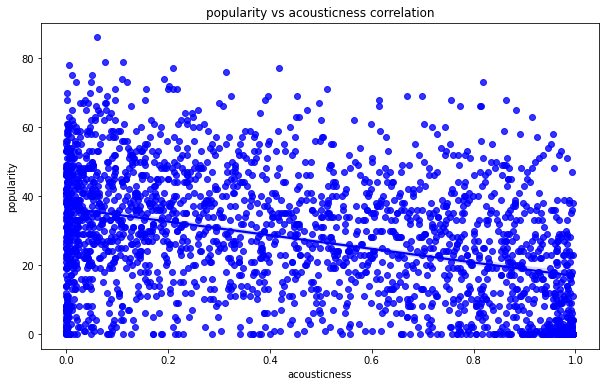

In [21]:
plt.figure(figsize=(10,6))
sns.regplot(data= sample_df, y="popularity", x="acousticness", color="b").set_title("popularity vs acousticness correlation")

In [22]:
df_tracks['dates']= df_tracks.index.get_level_values('release_date')
df_tracks.dates = pd.to_datetime(df_tracks.dates)
years = df_tracks.dates.dt.year

Plotting a histogram for number of songs over the years.

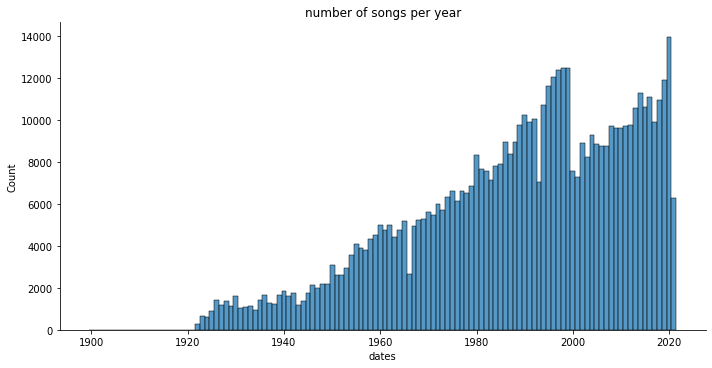

In [23]:
sns.displot(years, discrete=True, aspect=2, height=5, kind="hist").set(title="number of songs per year")

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 [Text(0, 0, '1900'),
  Text(1, 0, '1922'),
  Text(2, 0, '1923'),
  Text(3, 0, '1924'),
  Text(4, 0, '1925'),
  Text(5, 0, '1926'),
  Text(6, 0, '1927'),
  Text(7, 0, '1928'),
  Text(8, 0, '1929'),
  Text(9, 0, '1930'),
  Text(10, 0, '1931'),
  Text(11, 0, '1932'),
  Text(12, 0, '1933'),
  Text(13, 0, '1934'),
  Text(14, 0, '1935'),
  Text(15, 0, '1936'),
  Text(16, 0, '1937'),
  Text(17, 0, '1938'),
  Text(18, 0, '1939'),
  

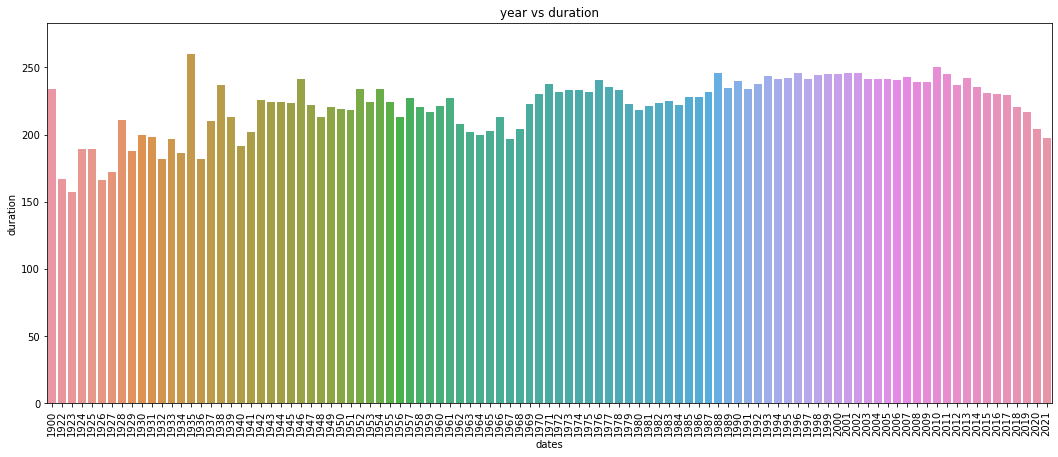

In [20]:
#duration of songs over the years
total_dr = df_tracks.duration
fig_dims = (18,7)
# defining figure axis
fig, ax = plt.subplots(figsize= fig_dims)
fig = sns.barplot(x=years, y=total_dr, ax = ax, errwidth = False).set(title="year vs duration") 
#errwidth =error width
plt.xticks(rotation=90)

# now analysing genres of songs

In [24]:
df_genre = pd.read_csv('/home/bhavya/data analysis projects/spotify/SpotifyFeatures.csv')

In [25]:
df_genre.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


Plotting the duration of songs in different genres:

Text(0, 0.5, 'genres')

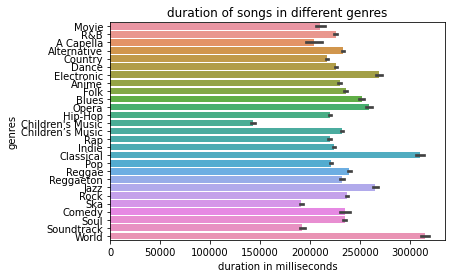

In [26]:
plt.title("duration of songs in different genres")
sns.color_palette("rocket", as_cmap = True)
sns.barplot(y="genre", x="duration_ms", data = df_genre)
plt.xlabel("duration in milliseconds")
plt.ylabel("genres")

Visualization of top 5 most popular genres:

[Text(0.5, 1.0, 'top 5 most popular genres')]

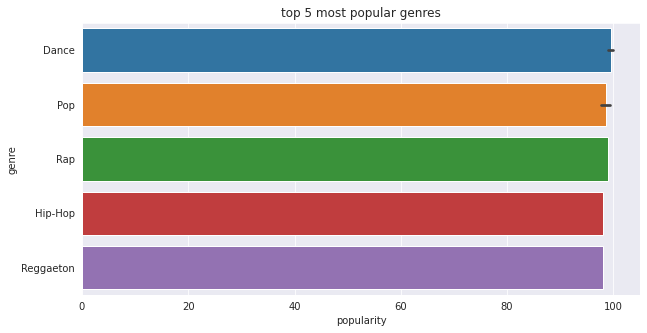

In [27]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
famous = df_genre.sort_values("popularity", ascending=False).head(10)
sns.barplot(y= "genre", x="popularity", data = famous).set(title= "top 5 most popular genres")

In [28]:
df_tracks.head()

,id,name,popularity,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration,dates
release_date,,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,127,1922-02-22
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,98,1922-06-01
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,182,1922-03-21
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,177,1922-03-21
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,163,1922-01-01


In [29]:
#to_string(index=False) removes the index from display
d1 = df_tracks[['name','popularity','danceability']].sort_values(by=["popularity","danceability"],ascending=False).head(10)
d1 = d1.to_string(index=False)
print(d1)

                                              name  popularity  danceability
            Peaches (feat. Daniel Caesar & Giveon)         100         0.677
                                   drivers license          99         0.585
                            Astronaut In The Ocean          98         0.778
                                   Save Your Tears          97         0.680
                                         telepatía          97         0.653
                               Leave The Door Open          96         0.586
                                   Blinding Lights          96         0.514
                                      The Business          95         0.798
                                              Fiel          94         0.849
Friday (feat. Mufasa & Hypeman) - Dopamine Re-Edit          94         0.824


the above was to see the danceability factor of popular songs.